# Bounded Poset Generation


In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [289]:
df = pd.read_csv('/Users/aaron/src/crafting-poset/out-file.csv')
df = df.reindex(sorted(df.columns), axis=1).drop(columns='e')

In [290]:
df.head()

,bernoulli-b0,circumference,diameter,eigen_degree_000,eigen_degree_001,eigen_degree_002,eigen_degree_003,girth,i,lambda-b0,lambda-b1,lambda-b2,num-edges,num-nodes
0,0.614012,0,7,17,6.0,NaN,NaN,0,0,0.150564,0.166292,0.300142,6,7
1,0.614012,0,0,23,NaN,NaN,NaN,0,1,0.150564,0.166292,0.300142,0,0
2,0.614012,6,7,14,7.0,2.0,NaN,0,2,0.150564,0.166292,0.300142,11,10
3,0.614012,4,6,16,5.0,2.0,NaN,0,3,0.150564,0.166292,0.300142,9,8
4,0.614012,0,0,23,NaN,NaN,NaN,0,4,0.150564,0.166292,0.300142,0,0


In [263]:
df.dtypes

bernoulli-b0        float64
circumference         int64
diameter              int64
eigen_degree_000      int64
eigen_degree_001    float64
eigen_degree_002    float64
eigen_degree_003    float64
girth                 int64
i                     int64
lambda-b0             int64
lambda-b1             int64
lambda-b2             int64
num-edges             int64
num-nodes             int64
dtype: object

In [292]:
len(df[df['num-nodes'] > 0])

53

In [293]:
df[df['num-nodes'] > 0]

,bernoulli-b0,circumference,diameter,eigen_degree_000,eigen_degree_001,eigen_degree_002,eigen_degree_003,girth,i,lambda-b0,lambda-b1,lambda-b2,num-edges,num-nodes
0,0.614012,0,7,17,6.0,NaN,NaN,0,0,0.150564,0.166292,0.300142,6,7
2,0.614012,6,7,14,7.0,2.0,NaN,0,2,0.150564,0.166292,0.300142,11,10
3,0.614012,4,6,16,5.0,2.0,NaN,0,3,0.150564,0.166292,0.300142,9,8
5,0.614012,0,6,18,5.0,NaN,NaN,0,5,0.150564,0.166292,0.300142,5,6
10,0.614012,0,6,18,5.0,NaN,NaN,0,10,0.150564,0.166292,0.300142,5,6
12,0.614012,8,6,11,9.0,1.0,2.0,0,12,0.150564,0.166292,0.300142,17,13
14,0.614012,8,6,13,7.0,3.0,NaN,0,14,0.150564,0.166292,0.300142,13,11
15,0.614012,10,6,12,6.0,4.0,1.0,0,15,0.150564,0.166292,0.300142,17,12
17,0.614012,8,7,14,8.0,1.0,NaN,0,17,0.150564,0.166292,0.300142,10,10
18,0.614012,6,6,15,5.0,3.0,NaN,0,18,0.150564,0.166292,0.300142,11,9


In [242]:
def map_col(df, column):
    return df.groupby(['lambda-b0', 'lambda-b1'], as_index=True) \
        .mean()[column] \
        .to_frame() \
        .reset_index() \
        .pivot(index='lambda-b0', columns='lambda-b1')
map_col(df, 'num-nodes')

,num-nodes
lambda-b1,3
lambda-b0,
-6,6.244444


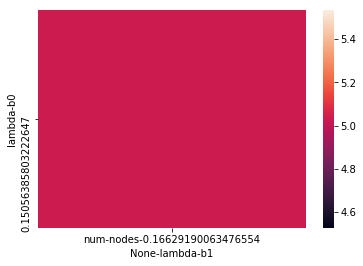

In [294]:
sns.heatmap(map_col(df, 'num-nodes'))

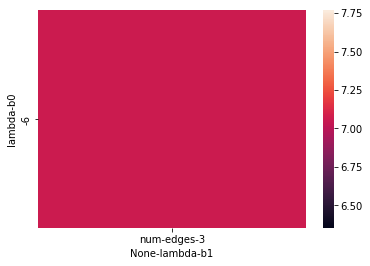

In [244]:
sns.heatmap(map_col(df, 'num-edges'))

Higher Cheeger constant = less bottlenecks
Lower Cheeger constant = more bottlenecks

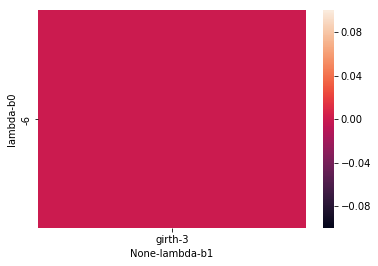

In [245]:
sns.heatmap(map_col(df, 'girth'))

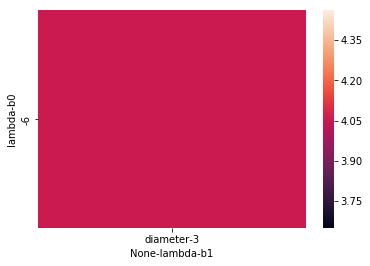

In [246]:
sns.heatmap(map_col(df, 'diameter'))

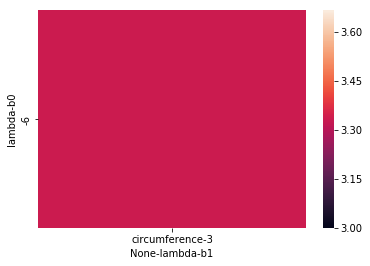

In [247]:
sns.heatmap(map_col(df, 'circumference'))

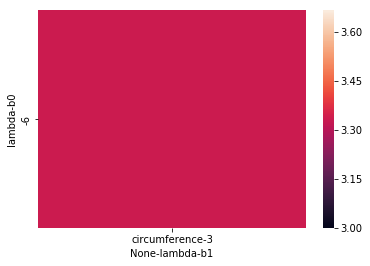

In [248]:
sns.heatmap(map_col(df, 'circumference'))

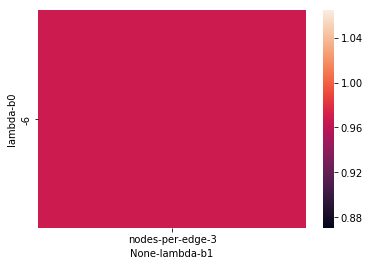

In [249]:
df['nodes-per-edge'] = df['num-nodes'] / df['num-edges']
sns.heatmap(map_col(df, 'nodes-per-edge'))

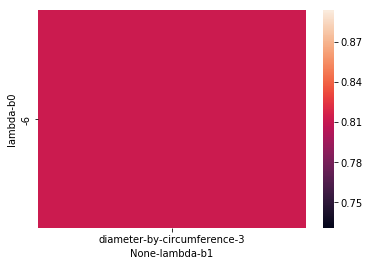

In [250]:
df['diameter-by-circumference'] = df['circumference'] / df['diameter']
sns.heatmap(map_col(df, 'diameter-by-circumference'))

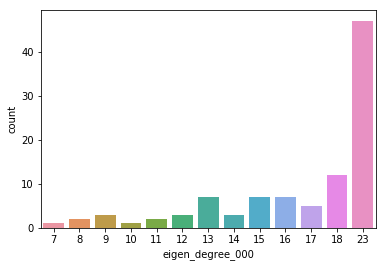

In [295]:
sns.countplot(df.eigen_degree_000)

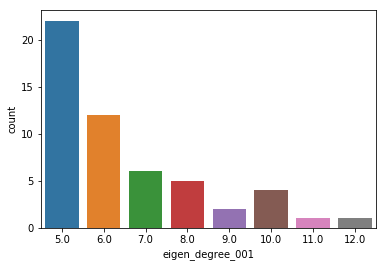

In [296]:
sns.countplot(df.eigen_degree_001)

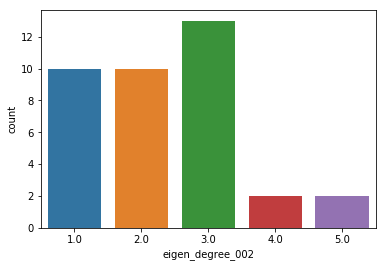

In [297]:
sns.countplot(df.eigen_degree_002)

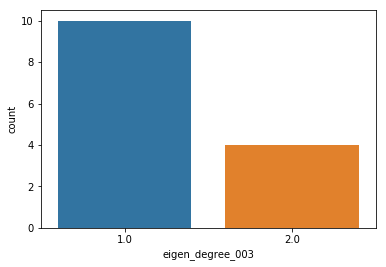

In [298]:
sns.countplot(df.eigen_degree_003)

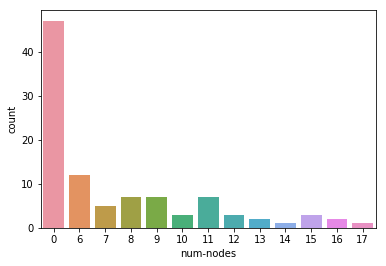

In [299]:
sns.countplot(df['num-nodes'])

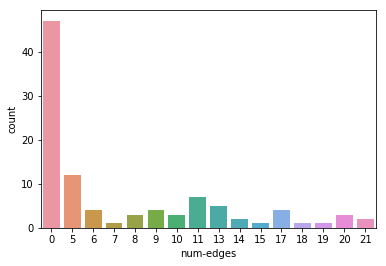

In [300]:
sns.countplot(df['num-edges'])

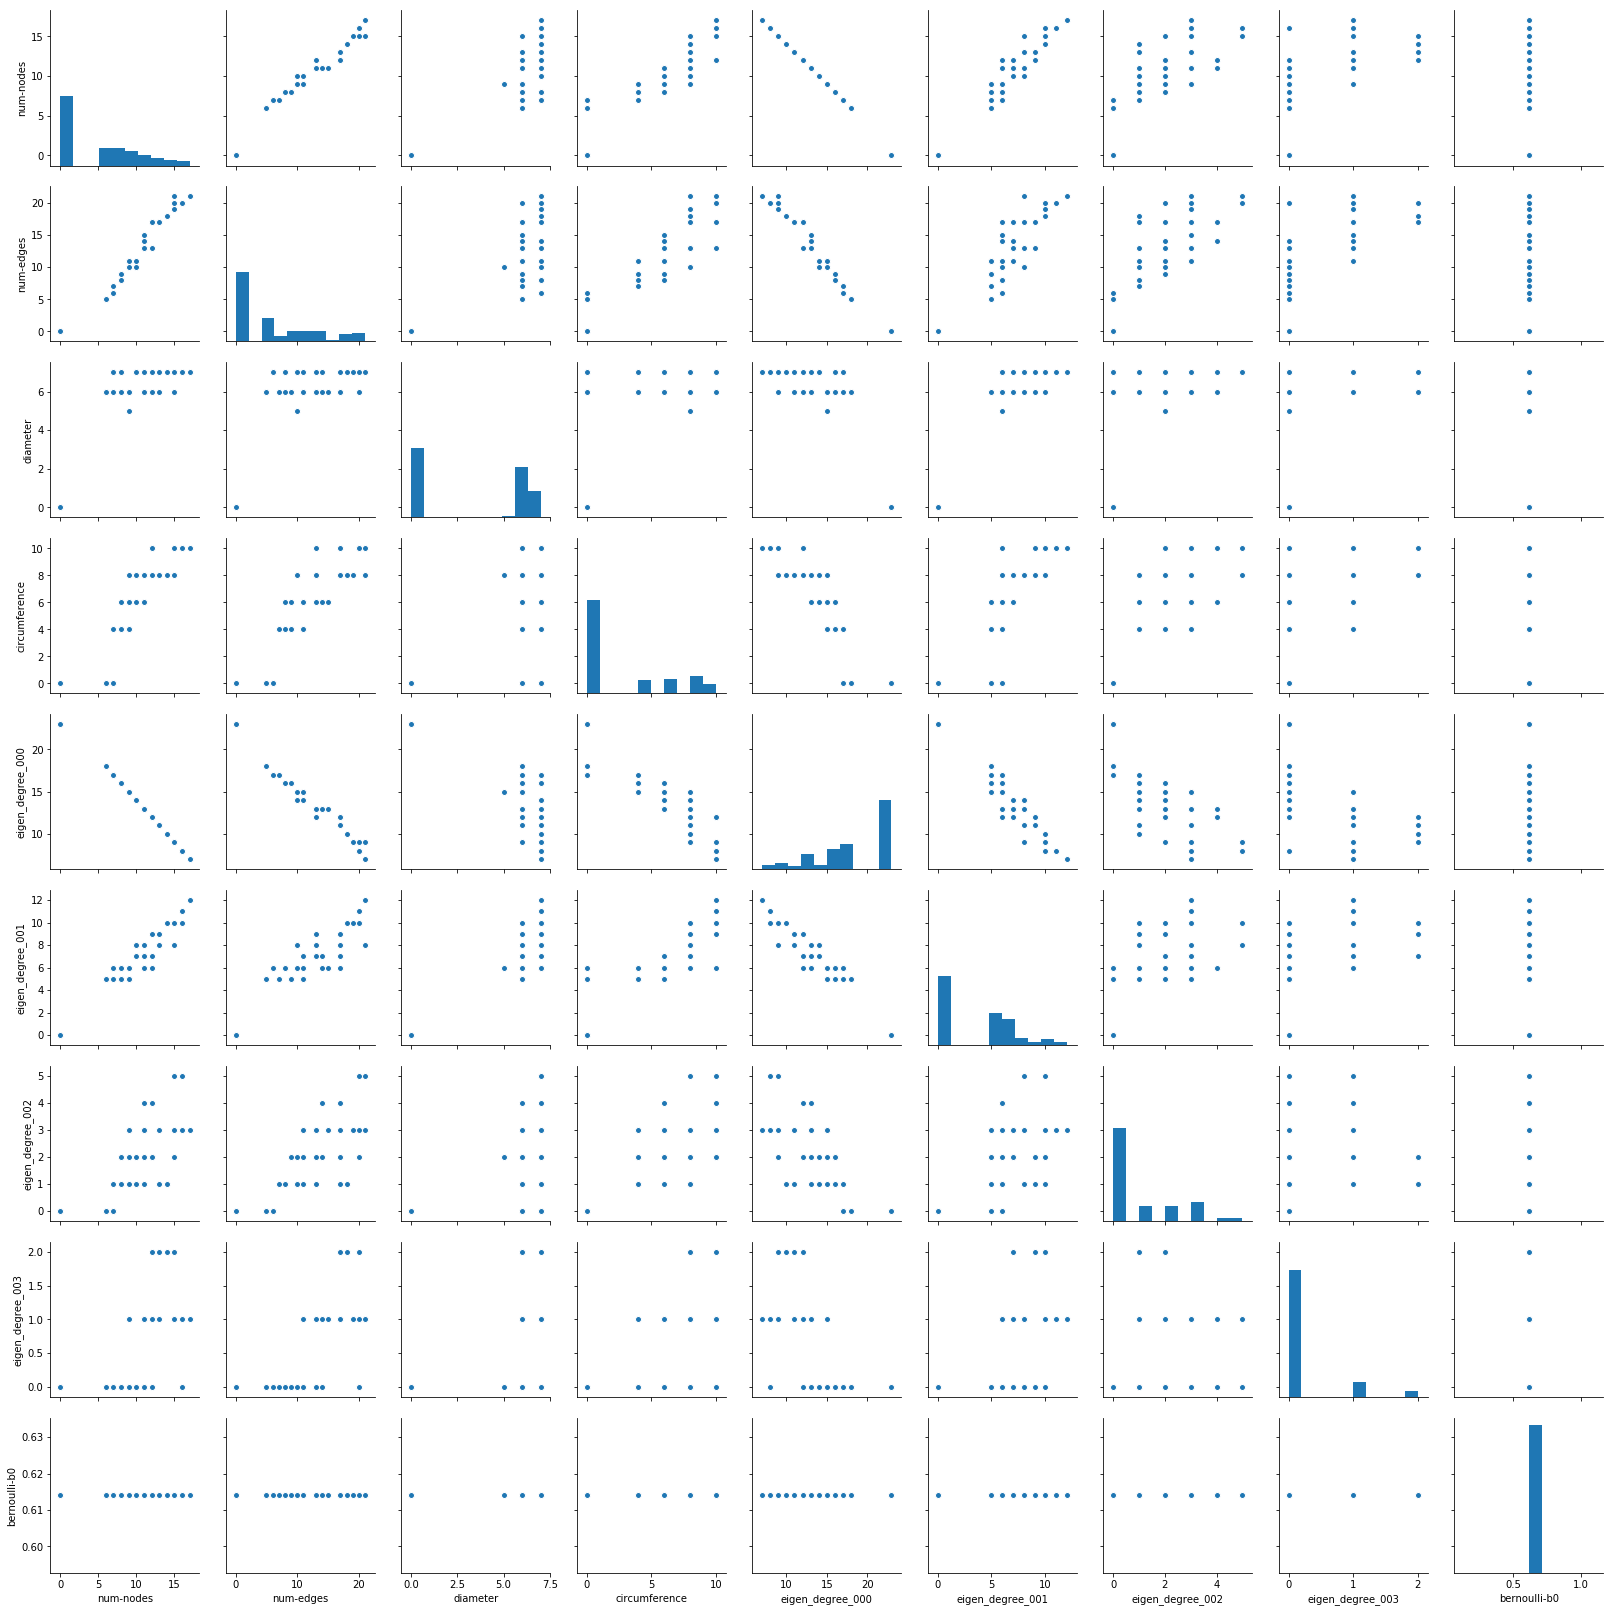

In [301]:
sns.pairplot(df[['num-nodes',
                 'num-edges',
                 'diameter',
                 'circumference',
                 'eigen_degree_000',
                 'eigen_degree_001',
                 'eigen_degree_002',
                 'eigen_degree_003',
                 'bernoulli-b0']].fillna(0))

In [258]:
df_a = df.copy()
df_a['good'] = pd.Series([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [259]:
df_a

,circumference,diameter,eigen_degree_000,eigen_degree_001,eigen_degree_002,eigen_degree_003,girth,i,lambda-b0,lambda-b1,lambda-b2,num-edges,num-nodes,nodes-per-edge,diameter-by-circumference,good
0,4,7,16,6.0,1.0,NaN,0,0,-6,3,1,8,8,1.000000,0.571429,1.0
1,8,7,10,9.0,3.0,1.0,0,1,-6,3,1,18,14,0.777778,1.142857,1.0
2,10,7,10,10.0,2.0,1.0,0,2,-6,3,1,17,14,0.823529,1.428571,0.0
3,12,7,6,12.0,4.0,1.0,0,3,-6,3,1,23,18,0.782609,1.714286,0.0
4,8,6,9,8.0,5.0,1.0,0,4,-6,3,1,21,15,0.714286,1.333333,1.0
5,4,7,16,6.0,1.0,NaN,0,5,-6,3,1,8,8,1.000000,0.571429,1.0
6,8,6,12,8.0,1.0,2.0,0,6,-6,3,1,16,12,0.750000,1.333333,0.0
7,10,6,10,7.0,6.0,NaN,0,7,-6,3,1,19,14,0.736842,1.666667,1.0
8,12,7,11,10.0,2.0,NaN,0,8,-6,3,1,14,13,0.928571,1.714286,0.0
9,10,7,5,11.0,5.0,2.0,0,9,-6,3,1,27,19,0.703704,1.428571,1.0


In [106]:
df_a.groupby('good')['num-edges'].mean()

good
0    33.625000
1    26.083333
Name: num-edges, dtype: float64

In [109]:
sp.stats.ttest_ind(df_a[df_a['good'] == 0]['num-nodes'],
                   df_a[df_a['good'] == 1]['num-nodes'])

Ttest_indResult(statistic=2.7933802535337913, pvalue=0.01200577743095863)

In [110]:
sp.stats.ttest_ind(df_a[df_a['good'] == 0]['num-edges'],
                   df_a[df_a['good'] == 1]['num-edges'])

Ttest_indResult(statistic=3.4012316379839755, pvalue=0.00318281552723473)

In [113]:
sp.stats.ttest_ind(df_a[df_a['good'] == 0]['circumference'],
                   df_a[df_a['good'] == 1]['circumference'])

Ttest_indResult(statistic=1.6226015595011363, pvalue=0.12205829246280556)